In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Augmentation

In [44]:
from glob import glob
from PIL import Image
from numpy import asarray
import numpy as np

In [45]:
frompath='/content/drive/Flower1/flowers/rose'
topath='/content/drive/Flower1'
folder='rose'
topath=topath+'/'+folder+'/'

In [46]:
images=glob(frompath+'/"')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  miring=img.transpose(Image.FLIP_LEFT_RIGHT)
  miring.save(topath+str(c)+'.jpg')
  c+=1
  rotating=img.rotate(90,Image.NEAREST,expand = 1)
  rotating.save(topath+str(c)+'.jpg')
  c+=1
  mirroting=rotating.transpose(Image.FLIP_LEFT_RIGHT)
  mirroting.save(topath+str(c)+'.jpg')
  c+=1

Image Augmentation

In [47]:
import cv2

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
%matplotlib inline

In [50]:
image = cv2.imread('/content/drive/MyDrive/Flower1/flowers/rose/3667366832_7a8017c528_n.jpg')
height,width = image.shape[:2]
resized_image=cv2.resize(image, (3*width,3*height),interpolation=cv2.INTER_CUBIC)

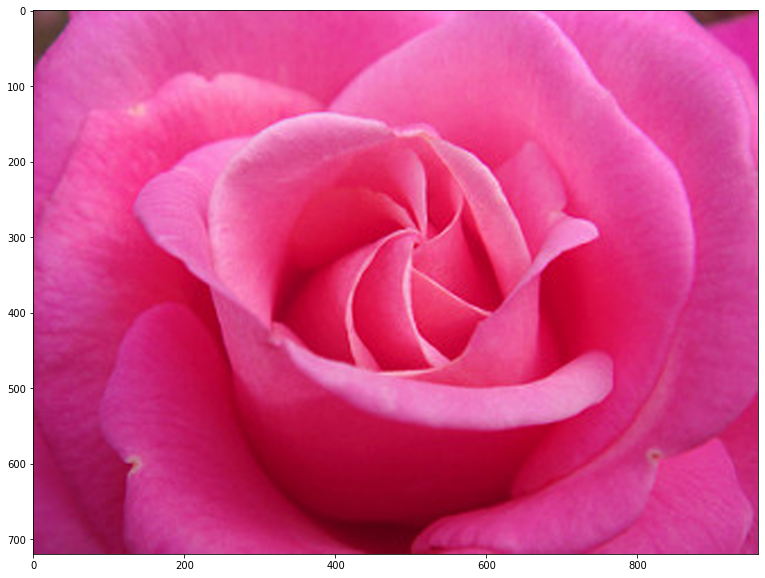

In [51]:
fig= plt.gcf()

fig.set_size_inches(18,10)
#fig.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
#pip install Augmentor

In [53]:
pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import imageio
import ipyplot
import imgaug as ia
import imgaug.augmenters as iaa

In [56]:
input_img = imageio.imread('/content/drive/MyDrive/Flower1/flowers/rose/10090824183_d02c613f10_m.jpg')

In [57]:
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)


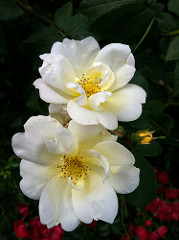
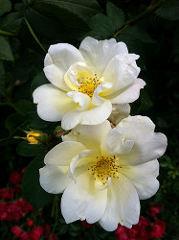
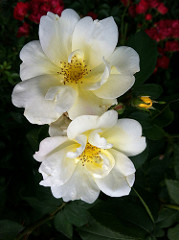


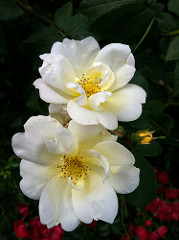
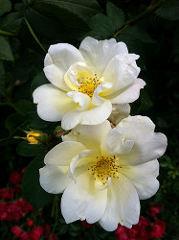
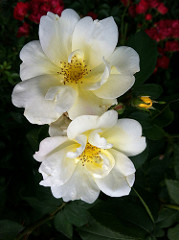

In [59]:
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


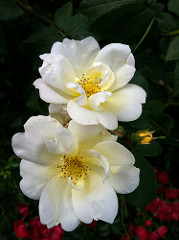
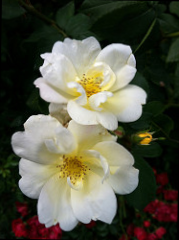


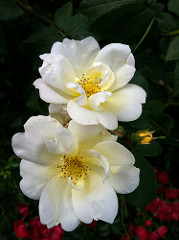
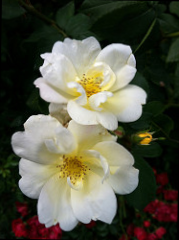

In [65]:
rot1 = iaa.Affine(rotate=(-30,30))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


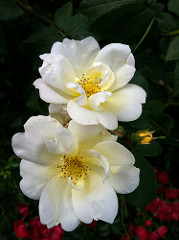
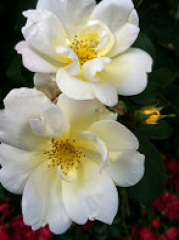


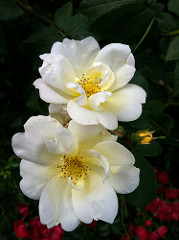
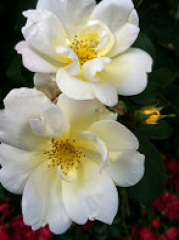

In [67]:
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


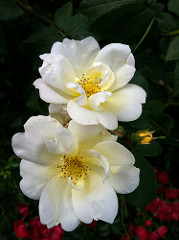
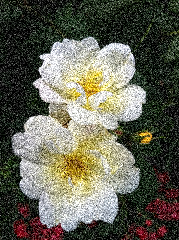


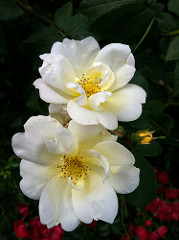
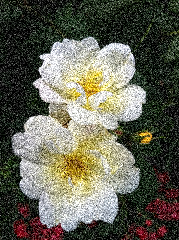

In [68]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


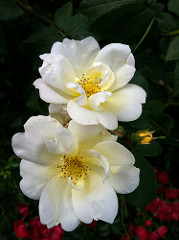
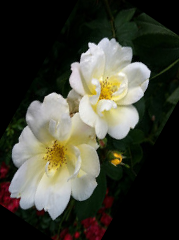


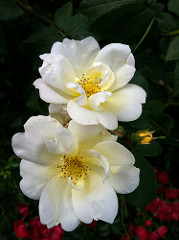
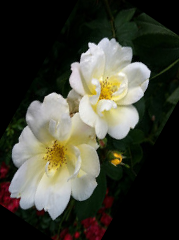

In [69]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


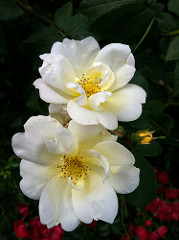
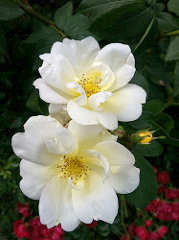
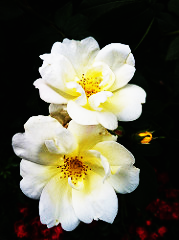
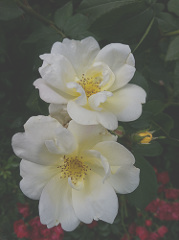


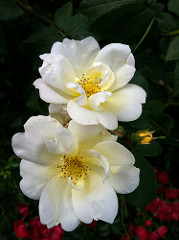
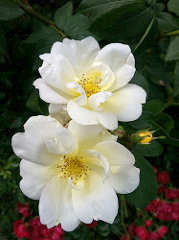
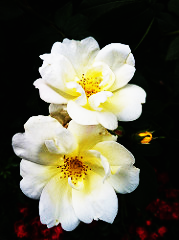
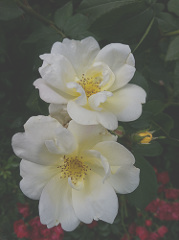

In [70]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

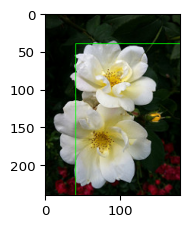

In [71]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=40, x2=550, y1=40, y2=780)
], shape=input_img.shape)
ia.imshow(bbs.draw_on_image(input_img))

In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [73]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [74]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [75]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [76]:
X_train=X_train/255
X_test=X_test/255

In [77]:
model=Sequential()

In [78]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [79]:
model.add(MaxPool2D(2,2))

In [80]:
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [81]:
model.add(Dense(10,activation='softmax'))

In [82]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1617 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0545 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0063 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [84]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0714 - accuracy: 0.9828


[0.07139358669519424, 0.9828000068664551]